In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task A- Data Pre-Processing

In [42]:
cd=pd.read_csv(r'D:\D\A_datascience_work\DSA\HV_classes\python_data_analysis_assignment\cards_data.csv')
td=pd.read_csv(r'D:\D\A_datascience_work\DSA\HV_classes\python_data_analysis_assignment\transactions_data.csv')
ud=pd.read_csv(r'D:\D\A_datascience_work\DSA\HV_classes\python_data_analysis_assignment\users_data.csv')

In [43]:
cd.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [44]:
td.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,$46.21,Online Transaction,15143,ONLINE,NaN,NaN,4784,NaN
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,NaN
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,NaN
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,NaN
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,NaN


In [45]:
ud.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


### Cleaning and formatting

In [46]:
cd.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [47]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     75 non-null     int64 
 1   client_id              75 non-null     int64 
 2   card_brand             75 non-null     object
 3   card_type              75 non-null     object
 4   card_number            75 non-null     int64 
 5   expires                75 non-null     object
 6   cvv                    75 non-null     int64 
 7   has_chip               75 non-null     object
 8   num_cards_issued       75 non-null     int64 
 9   credit_limit           75 non-null     object
 10  acct_open_date         75 non-null     object
 11  year_pin_last_changed  75 non-null     int64 
 12  card_on_dark_web       75 non-null     object
dtypes: int64(6), object(7)
memory usage: 7.7+ KB


In [48]:
cd.shape

(75, 13)

#### cards_data has 75 records with 13 columns

#### since 'expires' columns is in string format,extracting month and year from it by fiorst converting it to datetime format 

In [49]:
cd['expires_month']=pd.to_datetime(cd['expires'],format='%m/%Y').dt.month
cd['expires_year']=pd.to_datetime(cd['expires'],format='%m/%Y').dt.year

##### since credit limit is in string format due to presence of '$",first removing it and then converting to int format

In [52]:
cd['credit_limit']=cd['credit_limit'].str.replace(r'[\$\sA-Za-z]','',regex=True).astype('float')

##### since acct_open_date is in string format first coverting it to datetime format and then extracting month and year from it

In [55]:
cd['acct_open_month']=pd.to_datetime(cd['acct_open_date'],format='%m/%Y').dt.month
cd['acct_open_year']=pd.to_datetime(cd['acct_open_date'],format='%m/%Y').dt.year

In [56]:
cd['card_brand'].unique()

array(['Visa', 'Mastercard', 'Discover', 'Amex'], dtype=object)

we can see user uses 4 brands of cards ⬆️

In [57]:
cd['num_cards_issued'].unique()

array([2, 1, 3])

user uses max of 3 cards ⬆️

In [58]:
cd.isna().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
expires_month            0
expires_year             0
acct_open_month          0
acct_open_year           0
dtype: int64

we can observe that there are no null values present in cards data ⬆️

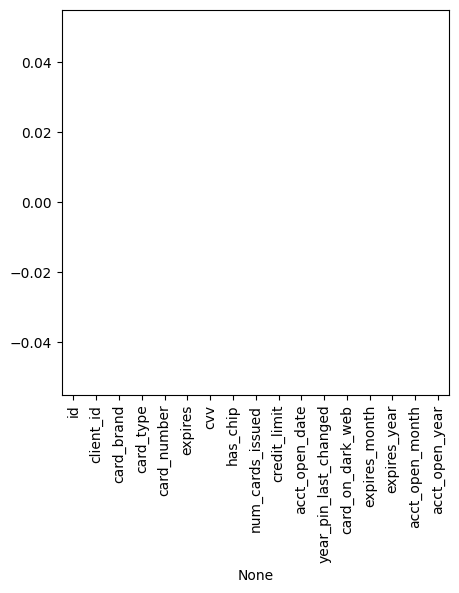

In [96]:
plt.figure(figsize=(5,5))
sns.barplot(x=cd.isna().sum().index,y=cd.isna().sum().values)
plt.xticks(rotation=90)
plt.show()

In [60]:
td.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,$46.21,Online Transaction,15143,ONLINE,NaN,NaN,4784,NaN
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,NaN
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,NaN
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,NaN
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,NaN


In [61]:
td.shape

(50000, 12)

transaction_data has total of 50000 records wirth 12 columns ⬆️

In [62]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50000 non-null  int64  
 1   date            50000 non-null  object 
 2   client_id       50000 non-null  int64  
 3   card_id         50000 non-null  int64  
 4   amount          50000 non-null  object 
 5   use_chip        50000 non-null  object 
 6   merchant_id     50000 non-null  int64  
 7   merchant_city   50000 non-null  object 
 8   merchant_state  41992 non-null  object 
 9   zip             41642 non-null  float64
 10  mcc             50000 non-null  int64  
 11  errors          855 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB


In [63]:
td['use_chip'].unique()

array(['Online Transaction', 'Swipe Transaction'], dtype=object)

we can see that 'use_chip' has two kinds of values 'Online Transaction', 'Swipe Transaction' and 'transaction' attached to it,let's remove it

In [64]:
td['use_chip'] = td['use_chip'].str.replace('Transaction','', regex=False).str.strip()
td['use_chip'] = td['use_chip'].str.title()

In [65]:
td['use_chip'].unique()

array(['Online', 'Swipe'], dtype=object)

now 'transaction' attached is removed ⬆️

In [66]:
td['merchant_city'].unique()

array(['ONLINE', 'Phoenix', 'Spring Valley', 'Boyne City', 'Louisville',
       'Abbeville', 'Goodwell', 'Warrington', 'New York', 'Tylersport',
       'Syracuse', 'Telford', 'West Covina', 'Cedarburg', 'East Troy',
       'Little Neck', 'Tucson', 'Davenport', 'Arnaudville', 'Camden',
       'Cleveland', 'Jonesboro', 'San Francisco', 'Monroe', 'Mamou',
       'New Hartford', 'Boise City', 'Prescott', 'Pellston', 'Mira Loma',
       'Staten Island', 'West Helena', 'La Verne', 'Calhoun', 'Pinetop',
       'Breaux Bridge', 'Warminster', 'Bartlesville', 'Traverse City',
       'Las Vegas', 'Alameda', 'Fort Washington', 'Hudson', 'Tyronza',
       'Beverly Hills', 'Bell Gardens', 'Compton', 'Monterey Park',
       'Georgetown', 'Guymon', 'Wynne', 'Alhambra', 'Arcadia', 'Crowley',
       'Shreveport', 'Oakland', 'Flagstaff', 'Bonita', 'Fresh Meadows',
       'Batesville', 'Camp Verde', 'Franklin', 'Corona', 'Bronx',
       'Turpin', 'Oakland Gardens', 'Prescott Valley', 'Alpine',
       'Tor

we can see that in unique values of city 'online' is there which is not a city

In [67]:
td['merchant_city']=td['merchant_city'].str.title().str.strip()

In [68]:
td['merchant_state'].unique()

array([nan, 'AZ', 'CA', 'MI', 'KY', 'LA', 'OK', 'PA', 'NY', 'WI', 'IA',
       'OH', 'AR', 'NV', 'Canada', 'NJ', 'IN', 'WV', 'FL', 'TX', 'NM',
       'IL', 'AK', 'TN', 'HI', 'Sierra Leone', 'Mexico', 'Haiti', 'AL',
       'MD', 'Guatemala', 'MO', 'VT', 'CT', 'VA', 'MN', 'ME', 'GA',
       'Colombia', 'WA', 'SC', 'Peru', 'France', 'Sweden', 'RI', 'MA',
       'NC', 'OR', 'MS', 'China', 'KS', 'WY', 'ID', 'South Korea',
       'Indonesia', 'Denmark', 'CO', 'Japan', 'United Kingdom',
       'Portugal', 'Jamaica', 'Hong Kong', 'MT', 'DE'], dtype=object)

In [69]:
td.isna().sum()

id                    0
date                  0
client_id             0
card_id               0
amount                0
use_chip              0
merchant_id           0
merchant_city         0
merchant_state     8008
zip                8358
mcc                   0
errors            49145
dtype: int64

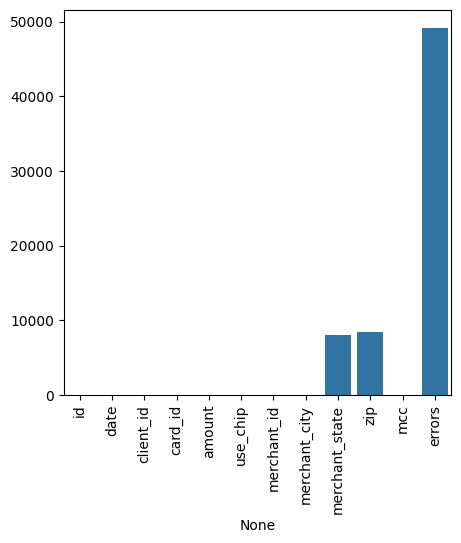

In [70]:
plt.figure(figsize=(5,5))
sns.barplot(x=td.isna().sum().index,y=td.isna().sum().values)
plt.xticks(rotation=90)
plt.show()

we can observe that error hs the most number of null values which cannot be rectified and dropping the rows in presence of 'errors' columns will drop the most of the data,so lets drop the error columns itself as it does not add any value to the analysis

In [71]:
td.drop(columns='errors',inplace=True)

In [72]:
td_online=td[td['merchant_city']=='Online']
len(td_online)

8008

In [73]:
len(td)-len(td_online)

41992

In [74]:
td=td[td['merchant_city']!='Online']

In [75]:
td['merchant_state'].unique()

array(['AZ', 'CA', 'MI', 'KY', 'LA', 'OK', 'PA', 'NY', 'WI', 'IA', 'OH',
       'AR', 'NV', 'Canada', 'NJ', 'IN', 'WV', 'FL', 'TX', 'NM', 'IL',
       'AK', 'TN', 'HI', 'Sierra Leone', 'Mexico', 'Haiti', 'AL', 'MD',
       'Guatemala', 'MO', 'VT', 'CT', 'VA', 'MN', 'ME', 'GA', 'Colombia',
       'WA', 'SC', 'Peru', 'France', 'Sweden', 'RI', 'MA', 'NC', 'OR',
       'MS', 'China', 'KS', 'WY', 'ID', 'South Korea', 'Indonesia',
       'Denmark', 'CO', 'Japan', 'United Kingdom', 'Portugal', 'Jamaica',
       'Hong Kong', 'MT', 'DE'], dtype=object)

In [76]:
td[td['merchant_state'].str.len()>2].shape[0]

350

Now Dropping the rows having null values 

In [77]:
td.dropna(inplace=True)

In [79]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41642 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41642 non-null  int64  
 1   date            41642 non-null  object 
 2   client_id       41642 non-null  int64  
 3   card_id         41642 non-null  int64  
 4   amount          41642 non-null  object 
 5   use_chip        41642 non-null  object 
 6   merchant_id     41642 non-null  int64  
 7   merchant_city   41642 non-null  object 
 8   merchant_state  41642 non-null  object 
 9   zip             41642 non-null  float64
 10  mcc             41642 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 3.8+ MB


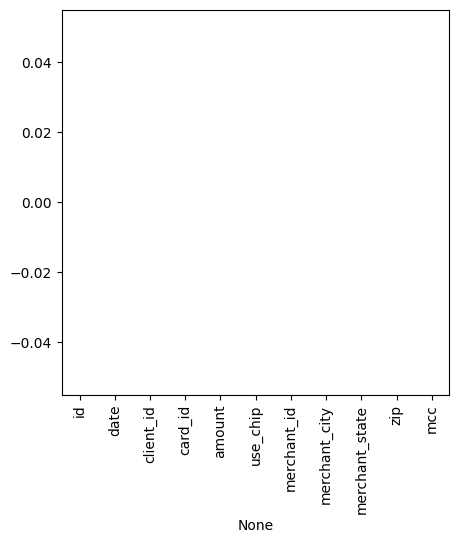

In [80]:
plt.figure(figsize=(5,5))
sns.barplot(x=td.isna().sum().index,y=td.isna().sum().values)
plt.xticks(rotation=90)
plt.show()

now we can see there are no null values

In [81]:
td

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe,20519,Phoenix,AZ,85015.0,5942
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe,20519,Spring Valley,CA,91977.0,5942
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe,79038,Phoenix,AZ,85015.0,7538
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe,27092,Boyne City,MI,49712.0,4829
5,7475874,2010-01-01 07:20:00,1075,3287,$18.99,Swipe,12614,Louisville,KY,40299.0,4121
...,...,...,...,...,...,...,...,...,...,...,...
49995,11865834,2012-10-29 10:45:00,153,107,$137.14,Swipe,7777,Los Angeles,CA,90005.0,3684
49996,11865927,2012-10-29 11:04:00,1718,5144,$12.09,Swipe,23695,West Covina,CA,91792.0,5411
49997,11866093,2012-10-29 11:42:00,153,107,$43.31,Swipe,94123,Page,AZ,86040.0,5310
49998,11866339,2012-10-29 12:33:00,1116,301,$124.76,Swipe,60569,Warrington,PA,18976.0,5300


since zip is in float type,converting it to int and making sure that it is of 5 digits by converting to string format and filling it with trailing zeros using zfill

In [82]:
td['zip']=td['zip'].astype('int').astype('str').str.zfill(5)


In [83]:
td

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe,20519,Phoenix,AZ,85015,5942
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe,20519,Spring Valley,CA,91977,5942
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe,79038,Phoenix,AZ,85015,7538
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe,27092,Boyne City,MI,49712,4829
5,7475874,2010-01-01 07:20:00,1075,3287,$18.99,Swipe,12614,Louisville,KY,40299,4121
...,...,...,...,...,...,...,...,...,...,...,...
49995,11865834,2012-10-29 10:45:00,153,107,$137.14,Swipe,7777,Los Angeles,CA,90005,3684
49996,11865927,2012-10-29 11:04:00,1718,5144,$12.09,Swipe,23695,West Covina,CA,91792,5411
49997,11866093,2012-10-29 11:42:00,153,107,$43.31,Swipe,94123,Page,AZ,86040,5310
49998,11866339,2012-10-29 12:33:00,1116,301,$124.76,Swipe,60569,Warrington,PA,18976,5300


In [84]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41642 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              41642 non-null  int64 
 1   date            41642 non-null  object
 2   client_id       41642 non-null  int64 
 3   card_id         41642 non-null  int64 
 4   amount          41642 non-null  object
 5   use_chip        41642 non-null  object
 6   merchant_id     41642 non-null  int64 
 7   merchant_city   41642 non-null  object
 8   merchant_state  41642 non-null  object
 9   zip             41642 non-null  object
 10  mcc             41642 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.8+ MB


In [85]:
ud.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [86]:
ud.shape

(25, 14)

In [87]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25 non-null     int64  
 1   current_age        25 non-null     int64  
 2   retirement_age     25 non-null     int64  
 3   birth_year         25 non-null     int64  
 4   birth_month        25 non-null     int64  
 5   gender             25 non-null     object 
 6   address            25 non-null     object 
 7   latitude           25 non-null     float64
 8   longitude          25 non-null     float64
 9   per_capita_income  25 non-null     object 
 10  yearly_income      25 non-null     object 
 11  total_debt         25 non-null     object 
 12  credit_score       25 non-null     int64  
 13  num_credit_cards   25 non-null     int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 2.9+ KB


In [89]:
ud.isna().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

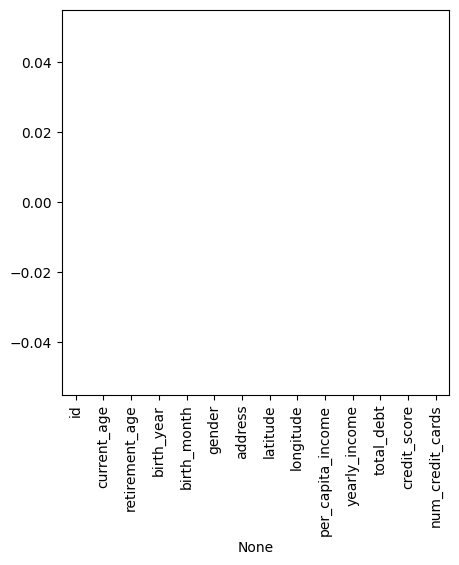

In [90]:
plt.figure(figsize=(5,5))
sns.barplot(x=ud.isna().sum().index,y=ud.isna().sum().values)
plt.xticks(rotation=90)
plt.show()

we can see that there are no null values in the users_data

In [91]:
ud.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


we can observe that 'per_capita_income','yearly_income','total_debt' is in string format due to presence of '$',so first removing '$' and then converting it to float type

In [92]:
ud['per_capita_income']=ud['per_capita_income'].str.replace(r'\D','',regex=True).astype('float')
ud['yearly_income']=ud['yearly_income'].str.replace(r'\D','',regex=True).astype('float')
ud['total_debt']=ud['total_debt'].str.replace(r'\D','',regex=True).astype('float')

In [93]:
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25 non-null     int64  
 1   current_age        25 non-null     int64  
 2   retirement_age     25 non-null     int64  
 3   birth_year         25 non-null     int64  
 4   birth_month        25 non-null     int64  
 5   gender             25 non-null     object 
 6   address            25 non-null     object 
 7   latitude           25 non-null     float64
 8   longitude          25 non-null     float64
 9   per_capita_income  25 non-null     float64
 10  yearly_income      25 non-null     float64
 11  total_debt         25 non-null     float64
 12  credit_score       25 non-null     int64  
 13  num_credit_cards   25 non-null     int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.9+ KB


In [94]:
print("Users duplicate rows:", ud.duplicated().sum())
print("Cards duplicate rows:", cd.duplicated().sum())
print("Transactions duplicate rows:", td.duplicated().sum())

Users duplicate rows: 0
Cards duplicate rows: 0
Transactions duplicate rows: 0


we can see there are no duplicate rows in either of the dataset,but we also need to check 'id' column for duplicacy of id's

In [95]:
print("Duplicate user IDs:", ud['id'].duplicated().sum())
print("Duplicate card IDs:", cd['id'].duplicated().sum())
print("Duplicate transaction IDs:", td['id'].duplicated().sum())


Duplicate user IDs: 0
Duplicate card IDs: 0
Duplicate transaction IDs: 0


### now we can see that there are no duplicate id's present in either of the dataset,so now we can be assured that all the dataset is clean and ready for analysis

## Task B - Data Analysis 

In [97]:
cd.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'expires_month',
       'expires_year', 'acct_open_month', 'acct_open_year'],
      dtype='object')

1. Customer Card Profile: 
    - Explore the user matrix across card_brand, card_type and credit_limit. 
    - Visualize using appropriate graphs for them. 
    - Extract insights and recommend actions. 


In [99]:
cd['card_brand'].value_counts()

card_brand
Mastercard    36
Visa          35
Discover       3
Amex           1
Name: count, dtype: int64

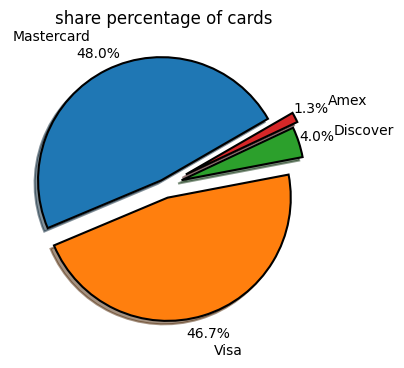

In [125]:
plt.figure(figsize=(4,4))
plt.pie(cd['card_brand'].value_counts(),
        labels=cd['card_brand'].value_counts().index,
        explode=np.linspace(0.05,0.2,len(cd['card_brand'].value_counts().values)),
        autopct='%1.1f%%',
        startangle=30,
        wedgeprops = {'edgecolor': 'black', 'linewidth': 1.5},
        textprops=dict(color="#000000"),
        shadow=True,
        pctdistance=1.15,
        labeldistance=1.3)
plt.title('share percentage of cards')
plt.show()

* we can clearly observe that 
    - mostly holded cards are mastercard and visa holding 48% and 46.7% shares and least holded cards are Discover and Amex holding only 4% and 1.3 % shares
        - Strategy: focus marketing and partnerships primarily on Visa and Mastercard

In [126]:
min(cd['credit_limit'])

28.0

In [127]:
max(cd['credit_limit'])

132439.0

In [131]:
cd['credit_limit'].median()

np.float64(15400.0)

* segmenting the cards on the basis of credit limit
    - 0 - 50000 --> low
    - 50000 - 120000 --> medium
    - above 120000 --> high

In [137]:
cd['credit_limit_segmentation']=pd.cut(cd['credit_limit'],bins=[0,50000,120000,float(np.inf)],labels=['low','medium','high'],include_lowest=True)
cd

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,expires_month,expires_year,acct_open_month,acct_open_year,credit_limit_segmentation
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,12,2022,9,2002,low
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968.0,04/2014,2014,No,12,2020,4,2014,low
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,46414.0,07/2003,2004,No,2,2024,7,2003,low
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,12400.0,01/2003,2012,No,8,2024,1,2003,low
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,28.0,09/2008,2009,No,3,2009,9,2008,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,3679,1946,Visa,Debit,4869845530765333,08/2024,701,YES,2,4488.0,07/2002,2015,No,8,2024,7,2002,low
71,5701,1946,Visa,Credit,4231526239204033,02/2020,499,YES,2,12500.0,11/2014,2014,No,2,2020,11,2014,low
72,4510,1674,Mastercard,Debit,5813611925507601,12/2020,734,YES,2,23432.0,09/2001,2008,No,12,2020,9,2001,low
73,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,8800.0,05/2005,2011,No,5,2022,5,2005,low


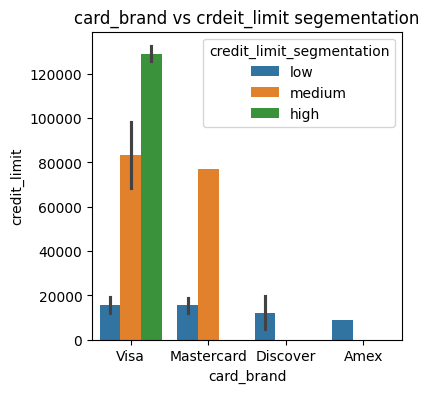

In [145]:
plt.figure(figsize=(4,4))
sns.barplot(x=cd['card_brand'],y=cd['credit_limit'],hue=cd['credit_limit_segmentation'])
plt.title('card_brand vs crdeit_limit segementation')
plt.show()

*  we can clearly observe that
    - Visa cards are given low to high credit limit -- higly focused
    - mastercards are given low to medium credit limit -- highly focus
    - discover and amex are given low credit limit  -- very low focus

    strategy-- if discover and amex cards are given higer credit limit,company might grow it's business paralelly with visa and mastercard

In [146]:
cd['card_type'].value_counts()

card_type
Debit              47
Credit             22
Debit (Prepaid)     6
Name: count, dtype: int64

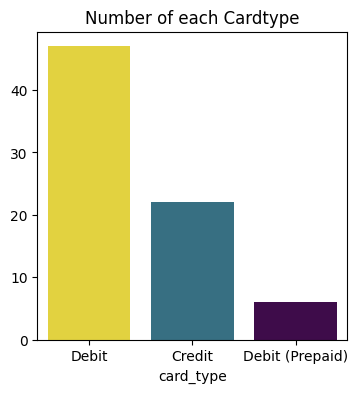

In [154]:
plt.figure(figsize=(4,4))
sns.barplot(x=cd['card_type'].value_counts().index,y=cd['card_type'].value_counts().values,hue=cd['card_type'].value_counts(),legend=False,palette='viridis')
plt.title('Number of each Cardtype')
plt.show()

above barplot shows that 'debit' card type is most holded card type and 'debit(prepaid)' card type is least holded card type

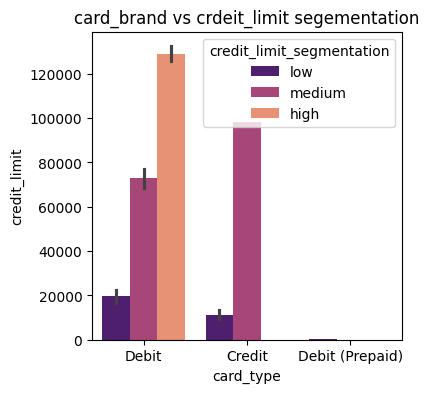

In [158]:
plt.figure(figsize=(4,4))
sns.barplot(x=cd['card_type'],y=cd['credit_limit'],hue=cd['credit_limit_segmentation'],palette='magma')
plt.title('card_brand vs crdeit_limit segementation')
plt.show()

* The above plot shows that
    - debit cards are given low to high credit limit
    - credit cards are given low to medium credit limit
    - debit(prepaid) cards are given no credit limit(obviously prepaid cards had to be pre balanced before expense)

In [164]:
cd.groupby(['card_brand','card_type'],as_index=False).agg(
    card_count=('id','count'),
    avg_credit_limit=('credit_limit', 'mean'),
    total_credit_exposure=('credit_limit', 'sum'),
    min_limit=('credit_limit', 'min'),
    max_limit=('credit_limit', 'max')
)

,card_brand,card_type,card_count,avg_credit_limit,total_credit_exposure,min_limit,max_limit
0,Amex,Credit,1,8800.000000,8800.0,8800.0,8800.0
1,Discover,Credit,3,11933.333333,35800.0,4700.0,19900.0
2,Mastercard,Credit,4,9850.000000,39400.0,6000.0,12100.0
3,Mastercard,Debit,27,21422.703704,578413.0,4147.0,77237.0
4,Mastercard,Debit (Prepaid),5,63.200000,316.0,28.0,99.0
5,Visa,Credit,14,17800.000000,249200.0,5600.0,98100.0
6,Visa,Debit,20,33148.150000,662963.0,620.0,132439.0
7,Visa,Debit (Prepaid),1,76.000000,76.0,76.0,76.0


* Insights from above Table:
    - most selling card combination debit-mastercard with low to medium credit limit
    - debit-visa card combination being the second most selling cards with low to high credit limit
    - amex and discover credit cards are least selling cards having low credit limit

this clearly shows that peoples are more interested in cards where low to high credit limit is given

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot()